In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
LABEL=9
x=tf.random.uniform([2,LABEL])
s=tf.math.top_k(x,k=5) #,sorted=False

mask=tf.one_hot(s[1],LABEL)
mask=tf.reduce_sum(mask,axis=1)

m=x*mask
m=tf.reduce_mean(m,axis=-1)
m=tf.stack([m for _ in range(LABEL)],axis=1)
x=x*(1-mask)+m 

tf.nn.softmax(x)

<tf.Tensor: shape=(2, 9), dtype=float32, numpy=
array([[0.14698942, 0.13463296, 0.09370851, 0.09370851, 0.09370851,
        0.09370851, 0.09370851, 0.10322896, 0.14660612],
       [0.100629  , 0.11833064, 0.12606408, 0.100629  , 0.100629  ,
        0.13305017, 0.100629  , 0.100629  , 0.11941014]], dtype=float32)>

In [148]:
class choose_k(tf.keras.layers.Layer):
    def __init__(self, k,input_length,logits=False,smoothing=1.):
        super(choose_k, self).__init__()
        self.k = k
        self.input_length=input_length
        self.logits=logits
        assert 0.<=smoothing<=1.
        self.smoothing=smoothing
    
    #@tf.function
    def call(self,x):
        LABEL=self.input_length
        s=tf.math.top_k(x,k=self.k,sorted=False)
        
        mask=tf.one_hot(s[1],LABEL)
        mask=tf.reduce_sum(mask,axis=1)

        m=tf.reduce_min(s[0],axis=-1)
        m=tf.stack([m for _ in range(LABEL)],axis=1)
        mask*=self.smoothing
        x=x*(1-mask)+m*mask
        if(self.logits):
            return x
        return self.k*tf.nn.softmax(x)

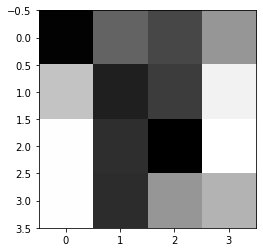

In [200]:
SIZE=[4,4]
x=tf.random.uniform([1]+SIZE)
#x=tf.math.exp(x)
x=choose_k(3,SIZE[0]*SIZE[1],logits=True,smoothing=.9)(tf.reshape(x,[1,SIZE[0]*SIZE[1]]))
img=tf.reshape(tf.nn.softmax(x),SIZE)
plt.imshow(img,cmap="gray")

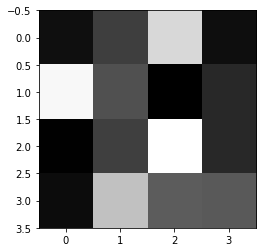

In [172]:
#SIZE=[100,100]
x=tf.random.uniform([1]+SIZE)
#x=tf.math.exp(x)
x=tf.nn.softmax(tf.reshape(x,[1,SIZE[0]*SIZE[1]]))
img=tf.reshape(x,SIZE)
plt.imshow(img,cmap="gray")

In [68]:
tf.argsort(tf.random.uniform([10**6]))

<tf.Tensor: shape=(1000000,), dtype=int32, numpy=array([875767, 700155, 957053, ..., 160875, 115816, 175681])>

In [162]:
def sample_without_replacement(logits, K):
    """
    Courtesy of https://github.com/tensorflow/tensorflow/issues/9260#issuecomment-437875125
    """
    z = -tf.math.log(-tf.math.log(tf.random.uniform(tf.shape(logits),0,1)))
    _, indices = tf.nn.top_k(logits + z, K)
    return indices

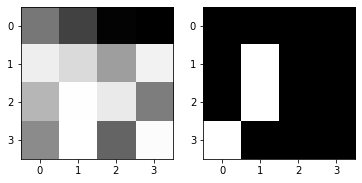

In [233]:
SIZE=[4,4]
x=tf.random.uniform([1]+SIZE)
#x=tf.math.exp(x)
x=choose_k(3,SIZE[0]*SIZE[1],logits=True,smoothing=.9)(tf.reshape(x,[1,SIZE[0]*SIZE[1]]))
img=tf.reshape(tf.nn.softmax(x),SIZE)


y=sample_without_replacement(x,3)
y=tf.one_hot(y,SIZE[0]*SIZE[1])
y=tf.reduce_sum(y,axis=1)
img_y=tf.reshape(y,SIZE)

f,axis=plt.subplots(1,2)
axis[0].imshow(img,cmap="gray")
axis[1].imshow(img_y,cmap="gray")